In [1]:
import pandas as pd

splits = {'train': 'train_df.csv', 'validation': 'val_df.csv', 'test': 'test_df.csv'}
df = pd.read_csv("hf://datasets/Sp1786/multiclass-sentiment-analysis-dataset/" + splits["train"])
df.head()


c:\projects\Sentiment analysis\sentiment\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


,id,text,label,sentiment
0,9536,"Cooking microwave pizzas, yummy",2,positive
1,6135,Any plans of allowing sub tasks to show up in ...,1,neutral
2,17697,"I love the humor, I just reworded it. Like sa...",2,positive
3,14182,naw idk what ur talkin about,1,neutral
4,17840,That sucks to hear. I hate days like that,0,negative


In [2]:
df.shape

(31232, 4)

In [3]:
df.isnull().sum()

id           0
text         0
label        0
sentiment    0
dtype: int64

EDA

In [4]:
df = df.drop("id" , axis=1)

In [5]:
df.head()


,text,label,sentiment
0,"Cooking microwave pizzas, yummy",2,positive
1,Any plans of allowing sub tasks to show up in ...,1,neutral
2,"I love the humor, I just reworded it. Like sa...",2,positive
3,naw idk what ur talkin about,1,neutral
4,That sucks to hear. I hate days like that,0,negative


In [6]:
df["label"].value_counts()

label
1    11649
2    10478
0     9105
Name: count, dtype: int64

In [7]:
df.nunique()

text         31232
label            3
sentiment        3
dtype: int64

In [8]:
df.duplicated().sum()

0

In [9]:
!pip install matplotlib
!pip install seaborn

In [10]:
import matplotlib as plt
import seaborn as sns


<Axes: xlabel='sentiment', ylabel='count'>

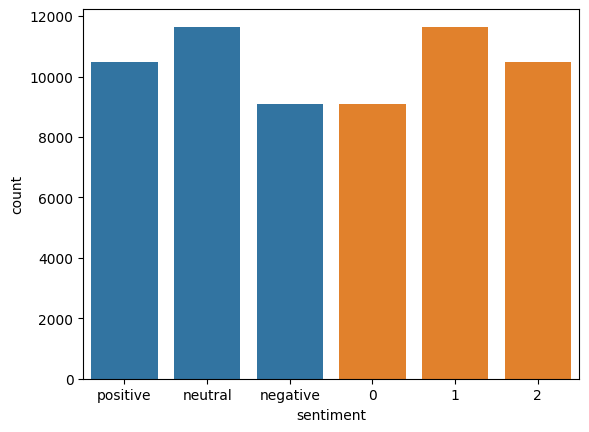

In [11]:
sns.countplot(df , x="sentiment")
sns.countplot(df , x="label")

In [12]:
!pip install wordcloud

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.stem.porter import PorterStemmer
nltk.download('stopwords')
from nltk.corpus import stopwords
STOPWORDS = set(stopwords.words('english'))

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
from wordcloud import WordCloud
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
import pickle
import re

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\kavana\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [14]:
cv = CountVectorizer(stop_words='english')
words = cv.fit_transform(df.text)

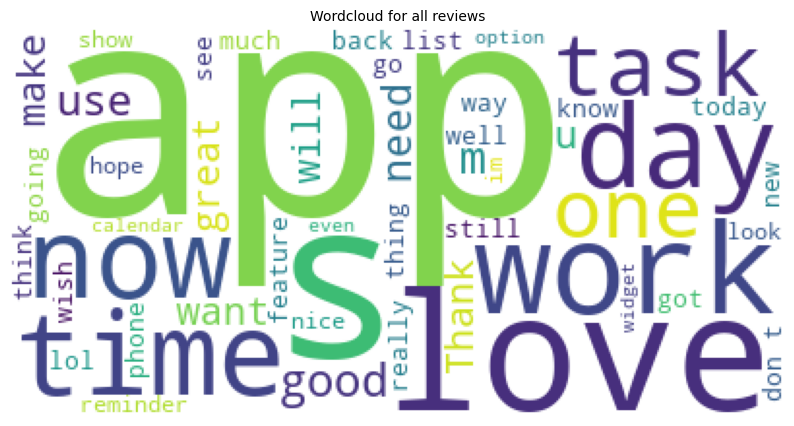

In [15]:
reviews = " ".join([review for review in df['text']])
                        
# Initialize wordcloud object
wc = WordCloud(background_color='white', max_words=50)

# Generate and plot wordcloud
plt.figure(figsize=(10,10))
plt.imshow(wc.generate(reviews))
plt.title('Wordcloud for all reviews', fontsize=10)
plt.axis('off')
plt.show()

In [16]:
neg_reviews = " ".join([review for review in df[df['label'] == 0]['text']])
neg_reviews = neg_reviews.lower().split()

pos_reviews = " ".join([review for review in df[df['label'] == 1]['text']])
pos_reviews = pos_reviews.lower().split()

#Finding words from reviews which are present in that feedback category only
unique_negative = [x for x in neg_reviews if x not in pos_reviews]
unique_negative = " ".join(unique_negative)

unique_positive = [x for x in pos_reviews if x not in neg_reviews]
unique_positive = " ".join(unique_positive)


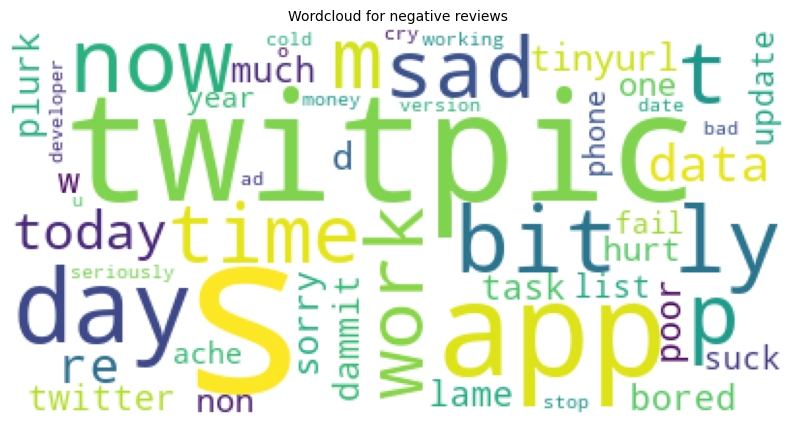

In [17]:
wc = WordCloud(background_color='white', max_words=50)

# Generate and plot wordcloud
plt.figure(figsize=(10,10))
plt.imshow(wc.generate(unique_negative))
plt.title('Wordcloud for negative reviews', fontsize=10)
plt.axis('off')
plt.show()

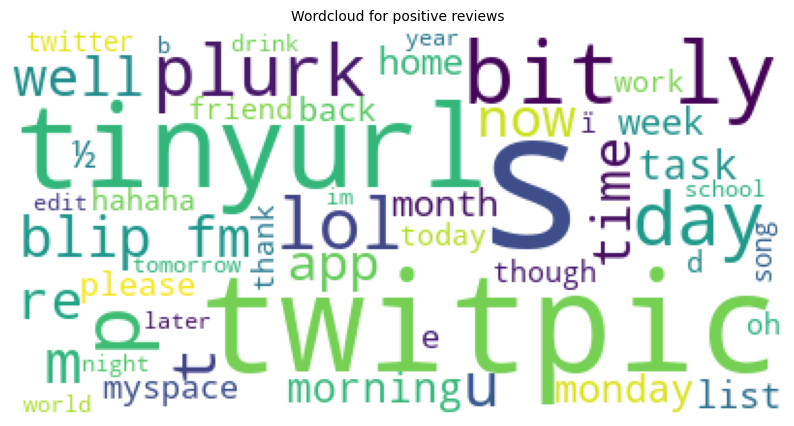

In [18]:
wc = WordCloud(background_color='white', max_words=50)

# Generate and plot wordcloud
plt.figure(figsize=(10,10))
plt.imshow(wc.generate(unique_positive))
plt.title('Wordcloud for positive reviews', fontsize=10)
plt.axis('off')
plt.show()

In [19]:
corpus = []
stemmer = PorterStemmer()
for i in range(0, df.shape[0]):
  review = re.sub('[^a-zA-Z]', ' ', df.iloc[i]['text'])
  review = review.lower().split()
  review = [stemmer.stem(word) for word in review if not word in STOPWORDS]
  review = ' '.join(review)
  corpus.append(review)

In [20]:
cv = CountVectorizer(max_features = 2500)
X = cv.fit_transform(corpus).toarray()
y = df['label'].values

X[0]

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [60]:
import joblib 
joblib.dump(cv ,'cv.pkl')

['cv.pkl']

In [21]:
print(f"X shape: {X.shape}")
print(f"y shape: {y.shape}")

X shape: (31232, 2500)
y shape: (31232,)


In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 15)

print(f"X train: {X_train.shape}")
print(f"y train: {y_train.shape}")
print(f"X test: {X_test.shape}")
print(f"y test: {y_test.shape}")

X train: (21862, 2500)
y train: (21862,)
X test: (9370, 2500)
y test: (9370,)


In [24]:
scaler = MinMaxScaler()

X_train_scl = scaler.fit_transform(X_train)
X_test_scl = scaler.transform(X_test)

In [62]:
with open('scaled.pkl', 'wb') as file:
    model_data = {
        'scaler': scaler,
        'X_train_scl': X_train_scl,
        'X_test_scl': X_test_scl
    }
    joblib.dump(model_data, file)

In [25]:
model_rf = RandomForestClassifier()
model_rf.fit(X_train_scl, y_train)

RandomForestClassifier()

Training Accuracy : 0.9868264568657945
Testing Accuracy : 0.6637139807897545


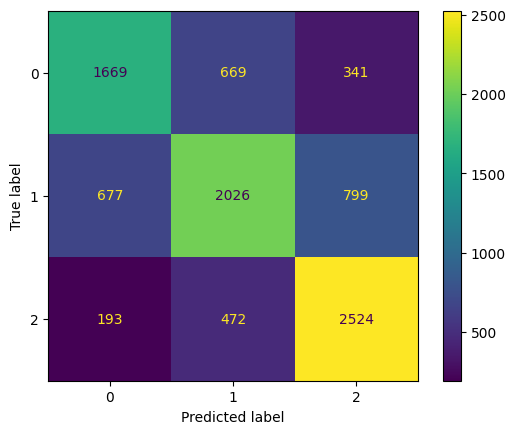

In [26]:
 
y_preds = model_rf.predict(X_test_scl)
cm = confusion_matrix(y_test, y_preds)
print("Training Accuracy :", model_rf.score(X_train_scl, y_train))
print("Testing Accuracy :", model_rf.score(X_test_scl, y_test))
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model_rf.classes_)
cm_display.plot()
plt.show()

In [27]:
!pip install xgboost

In [28]:
from xgboost import XGBClassifier

model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
model.fit(X_train_scl, y_train)
y_pred = model.predict(X_test_scl)

print(accuracy_score(y_test, y_pred))

c:\projects\Sentiment analysis\sentiment\Lib\site-packages\xgboost\core.py:158: UserWarning: [09:13:22] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


0.6631803628601921


In [29]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X_train_scl, y_train)


y_pred_train = log_reg.predict(X_train_scl)
y_pred_test = log_reg.predict(X_test_scl)

print("Training Accuracy:", accuracy_score(y_train, y_pred_train))
print("Testing Accuracy:", accuracy_score(y_test, y_pred_test))

Training Accuracy: 0.739593815753362
Testing Accuracy: 0.6531483457844184


In [34]:
sentence_to_predict = X[4]

sentence = df.iloc[4]
predictions = log_reg.predict([sentence_to_predict])

sentiment_map = {
    0: "Negative",
    1: "Neutral",
    2: "Positive"
}

predicted_sentiment = sentiment_map[predictions[0]]
print(f"Sentence: '{sentence}' => Predicted Sentiment: {predicted_sentiment}")



Sentence: 'text          That sucks to hear. I hate days like that
label                                                 0
sentiment                                      negative
Name: 4, dtype: object' => Predicted Sentiment: Negative


In [48]:
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
xgb_model = XGBClassifier()
rf_model = RandomForestClassifier()


stacking_model = StackingClassifier(
    estimators=[
        ('xgb', xgb_model),
        ('rf', rf_model)
    ],
    final_estimator=RandomForestClassifier()
)

stacking_model.fit(X_train_scl, y_train)

y_pred_stack_test = stacking_model.predict(X_test_scl)

y_pred_stack_train = log_reg.predict(X_train_scl)

accuracy = accuracy_score(y_test, y_pred)

print(f'Accuracy: {accuracy}')

print("Training Accuracy:", accuracy_score(y_train, y_pred_stack_train))
print("Testing Accuracy:", accuracy_score(y_test, y_pred_stack_test))



Accuracy: 0.6635005336179296
Training Accuracy: 0.739593815753362
Testing Accuracy: 0.6636072572038421


In [52]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(stacking_model, X_train_scl, y_train, cv=5)
print(f'Cross-Validation Accuracy Scores: {scores}')
print(f'Mean Cross-Validation Accuracy: {scores.mean()}')

Cross-Validation Accuracy Scores: [0.65126915 0.6460096  0.64867338 0.64501372 0.65118939]
Mean Cross-Validation Accuracy: 0.6484310485473009


In [53]:
stacking_model.fit(X_train_scl, y_train)

y_pred_stack_test = stacking_model.predict(X_test_scl)

y_pred_stack_train = log_reg.predict(X_train_scl)

accuracy = accuracy_score(y_test, y_pred)

print(f'Accuracy: {accuracy}')

print("Training Accuracy:", accuracy_score(y_train, y_pred_stack_train))
print("Testing Accuracy:", accuracy_score(y_test, y_pred_stack_test))



Accuracy: 0.6635005336179296
Training Accuracy: 0.739593815753362
Testing Accuracy: 0.6635005336179296


In [56]:
sentence_to_predict = X[3222]

sentence = df.iloc[3222]
predictions = stacking_model.predict([sentence_to_predict])

sentiment_map = {
    0: "Negative",
    1: "Neutral",
    2: "Positive"
}

predicted_sentiment = sentiment_map[predictions[0]]
print(f"Sentence: '{sentence}' => Predicted Sentiment: {predicted_sentiment}")

Sentence: 'text         Pathetic. I was totally in love with this app ...
label                                                        0
sentiment                                             negative
Name: 3222, dtype: object' => Predicted Sentiment: Negative


In [57]:
import joblib 
joblib.dump(stacking_model, 'model.pkl')

['model.pkl']

In [58]:
import pickle

# Assuming stacking_model is your trained model
with open('model.pkl', 'wb') as file:
    pickle.dump(stacking_model, file)
